In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers import Dense, LSTM

Using TensorFlow backend.


In [2]:
df1 = pd.read_csv("data/train_preliminary/user.csv")
df2 = pd.read_csv("data/train_preliminary/ad.csv")
df3 = pd.read_csv("data/train_preliminary/click_log.csv")
df_tmp = pd.merge(df3, df1, left_on='user_id', right_on='user_id')
df = pd.merge(df_tmp, df2, left_on='creative_id', right_on='creative_id')
order = ['user_id', 'time', 'creative_id', 'click_times', 'ad_id', 'product_category', 'advertiser_id']
df = df[order]
df.head()

,user_id,time,creative_id,click_times,ad_id,product_category,advertiser_id
0,30920,9,567330,1,504423,3,32638
1,320815,15,567330,1,504423,3,32638
2,355089,11,567330,1,504423,3,32638
3,363442,9,567330,1,504423,3,32638
4,370513,14,567330,1,504423,3,32638


In [3]:
df.sort_values(['user_id', 'time'], inplace=True)

In [4]:
df

,user_id,time,creative_id,click_times,ad_id,product_category,advertiser_id
16204330,1,20,877468,1,773445,5,29455
23067470,1,20,209778,1,188507,2,9702
26781033,1,20,821396,1,724607,5,7293
22502290,1,39,1683713,1,1458878,5,14668
9504689,1,40,122032,1,109959,2,11411
...,...,...,...,...,...,...,...
28703035,900000,57,2692144,1,2316309,5,14372
15724163,900000,71,3391205,1,2918341,5,22137
7226547,900000,72,3471208,1,2989104,5,7283
9638586,900000,74,3527098,1,3037879,18,14681


In [5]:
df.reset_index(drop=True, inplace=True)
df

,user_id,time,creative_id,click_times,ad_id,product_category,advertiser_id
0,1,20,877468,1,773445,5,29455
1,1,20,209778,1,188507,2,9702
2,1,20,821396,1,724607,5,7293
3,1,39,1683713,1,1458878,5,14668
4,1,40,122032,1,109959,2,11411
...,...,...,...,...,...,...,...
30082766,900000,57,2692144,1,2316309,5,14372
30082767,900000,71,3391205,1,2918341,5,22137
30082768,900000,72,3471208,1,2989104,5,7283
30082769,900000,74,3527098,1,3037879,18,14681


In [6]:
a = df.groupby('user_id')['click_times'].sum()
a.min()

10

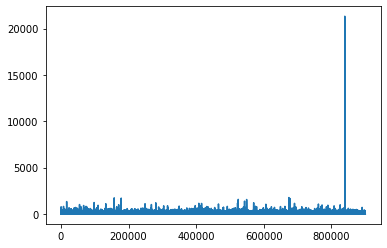

In [7]:
plt.plot(a)

In [8]:
df.groupby('user_id')['user_id'].count().min()

2

In [9]:
df_tmp1 = pd.get_dummies(df['creative_id'] % 10)
print(df_tmp1.shape)
df_tmp2 = pd.get_dummies(df['ad_id'] % 10)
print(df_tmp2.shape)
df_tmp3 = pd.get_dummies(df['product_category'])
print(df_tmp3.shape)
df_tmp4 = pd.get_dummies(df['advertiser_id'] % 10)
print(df_tmp4.shape)

(30082771, 10)
(30082771, 10)
(30082771, 18)
(30082771, 10)


In [10]:
data = np.zeros((100000, 10, 49), dtype = float)
pos = 0
for i in range(100000):
    while df.iloc[pos, 0] != i + 1:
        pos += 1
    now = 0
    while now < 10:
        for k in range(df.iloc[pos, 3]):
            data[i][now][0] = df.iloc[pos][1]
            data[i][now][1:11] = df_tmp1.iloc[pos]
            data[i][now][11:21] = df_tmp2.iloc[pos]
            data[i][now][21:39] = df_tmp3.iloc[pos]
            data[i][now][39:49] = df_tmp4.iloc[pos]
            now += 1
            if now >= 10:
                break
        pos += 1
data

KeyboardInterrupt: 

In [ ]:
Y2_train, Y2_test = df1.iloc[:90000, 2:3], df1.iloc[90000:100000, 2:3]
X_train, X_test = data[:90000,:,:], data[90000:,:,:]
model = Sequential()
model.add(LSTM(32, input_shape=(data.shape[1], data.shape[2])))
model.add(Dense(1))
model.compile(loss='MSE', optimizer='adam')
model.fit(X_train, Y2_train, nb_epoch=100)

In [ ]:
Y = model.predict(X_test)

In [ ]:
Y = np.round(Y)

In [ ]:
Y2_test

In [ ]:
ans = 0 
for i in range(10000):
    if Y[i] == Y2_test['gender'][i+90000]:
        ans += 1
print('accurency:', ans/10000)

In [ ]:
Y = model.predict(X_train)
Y = np.round(Y)
ans = 0 
for i in range(90000):
    if Y[i] == Y2_train['gender'][i]:
        ans += 1
print('accurency:', ans/90000)

In [ ]:
df.groupby('user_id')['click_times'].sum()

In [ ]:
a = df.groupby('user_id')['click_times'].sum()
a = a.value_counts()
a[a > 100].count()

In [ ]:
df.groupby('user_id')['click_times'].sum().min()

In [ ]:
a = df.groupby('user_id')['click_times'].count()
a[a > 200].count()